In [1]:
import re

import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML

In [2]:
with open('../../data/clean/misconduct_indicators_train.pkl', 'rb') as train_file:
    misconduct = pickle.load(train_file)

In [3]:
indicated_cols = [
    'misconduct_type',
    'court_type',
    'enforcement_agency',
    'contracting_party'
]

indicator_features = [
    col for col in misconduct.columns
    if re.search(f'^({"|".join(indicated_cols)})_', col)
]


In [4]:
def plot_confusion_matrix(model):
    misconduct_train, misconduct_test = train_test_split(misconduct, test_size=0.2)

    model.fit(
        misconduct_train[[*indicator_features]],
        misconduct_train.disposition_type
    )

    labels = list(set(misconduct_test.disposition_type))

    model_confusion = confusion_matrix(
        misconduct_test.disposition_type,
        model.predict(misconduct_test[[*indicator_features]]),
        labels=labels
    )

    plt.figure(dpi=150)
    sns.set(font_scale=0.6)
    sns.heatmap(
        model_confusion**0.2, # root for better color scale
        annot=model_confusion, # but keep annotations accurate
        square=True,
        annot_kws={
            'size': 4
        },
        xticklabels=labels,
        yticklabels=labels,
        cbar=False
    )

    plt.xlabel('Predicted', fontdict={'fontsize': 10})
    plt.ylabel('Actual', fontdict={'fontsize': 10})
    plt.title(f'{type(model).__name__} Confusion Matrix', loc='left', fontdict={'fontsize': 12});

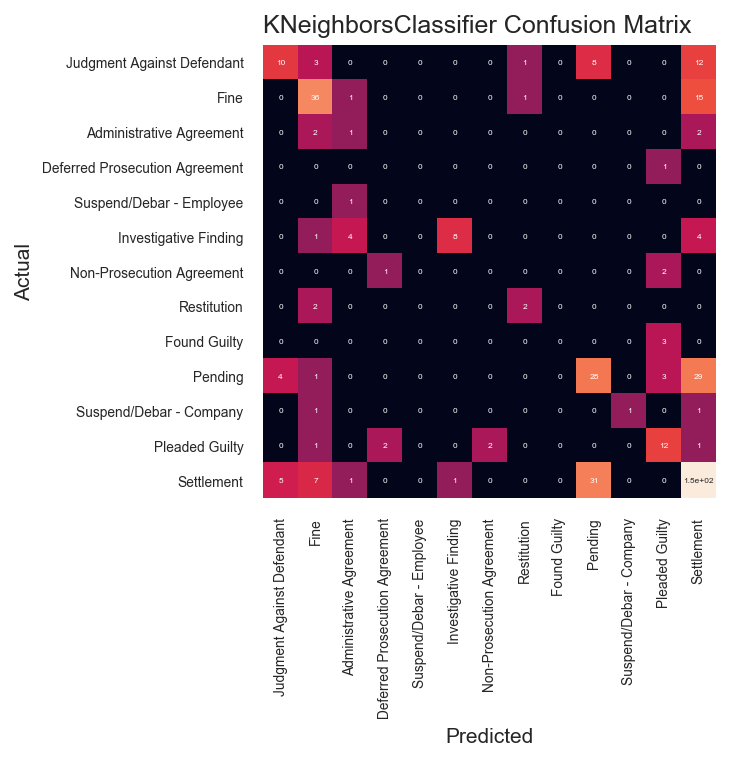

In [5]:
plot_confusion_matrix(
    KNeighborsClassifier(p=1, weights='distance', n_neighbors=30)
);

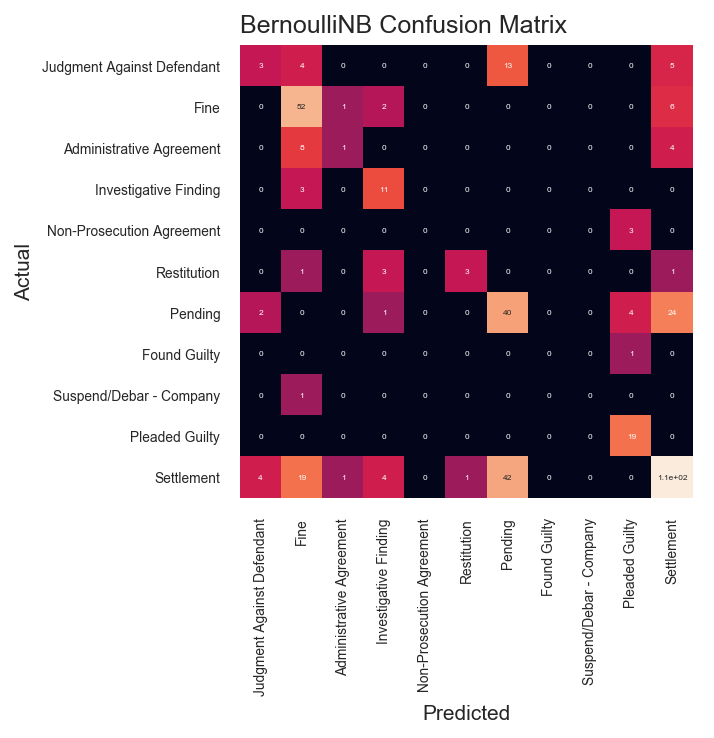

In [6]:
plot_confusion_matrix(
    BernoulliNB()
);

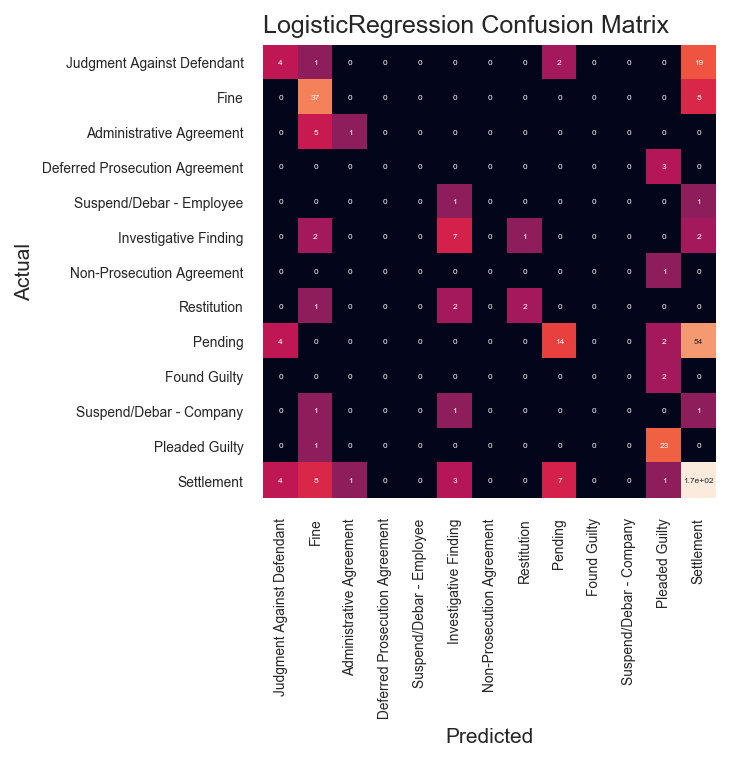

In [7]:
plot_confusion_matrix(
    LogisticRegression(solver='sag', multi_class='auto')
);

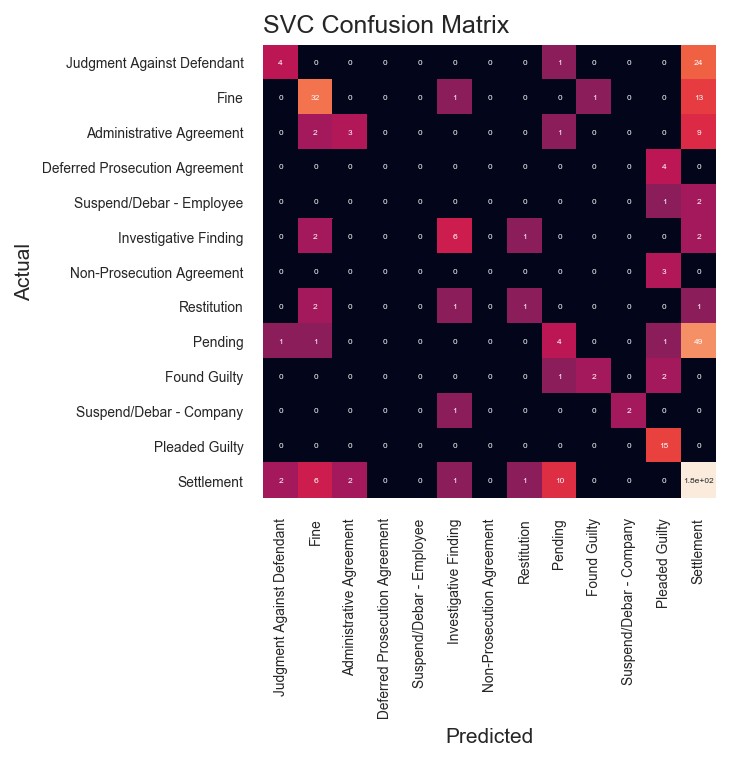

In [8]:
plot_confusion_matrix(
    SVC(kernel='linear')
);

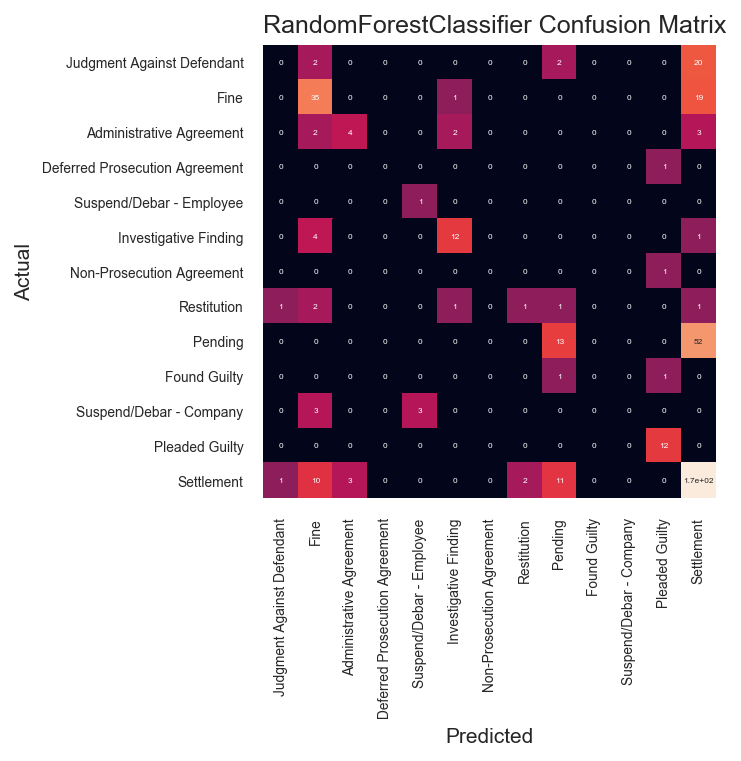

In [9]:
plot_confusion_matrix(
    RandomForestClassifier(
        n_estimators=76,
        max_depth=16,
        criterion='entropy',
        random_state=62
    )
);